# HOUSING DENSITY & BIRTH RATE

### TABLE OF CONTENTS
1. [ABOUT THE DATASET](#about_the_dataset)
2. [LANDING INFORMATIONS](#landing_information)
3. [POPULATION PER BOROUGH](#population_per_borough)

### ABOUT THE DATA<a name='about_the_dataset'></a>

This dataset collects informations about land area and population density for a window of time that goes from 2001 to
2050, however here are shown only the informations from 2008 to 2016, since the main dataset about criminal 
activities describes that period of time.

### LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

### DATASETS

In [2]:
population = pd.read_csv('../data/population.csv')

In [3]:
land_info = pd.DataFrame(columns=['Name', 'Inland Area Hectares', 
                                  'Total Area Hectares', 'Square Kilometres'])

for index, name in enumerate(population['Name'].unique()):
    iah = population['Inland Area Hectares'].unique()[index]
    tah = population['Total Area Hectares'].unique()[index]
    sk = population['Square Kilometres'].unique()[index]
    
    land_info.loc[land_info.shape[0]] = [name, iah, tah, sk]

### LANDING INFORMATIONS<a name='landing_informations'></a>

Here I present some visualizations about the dataset's landing-related variables.

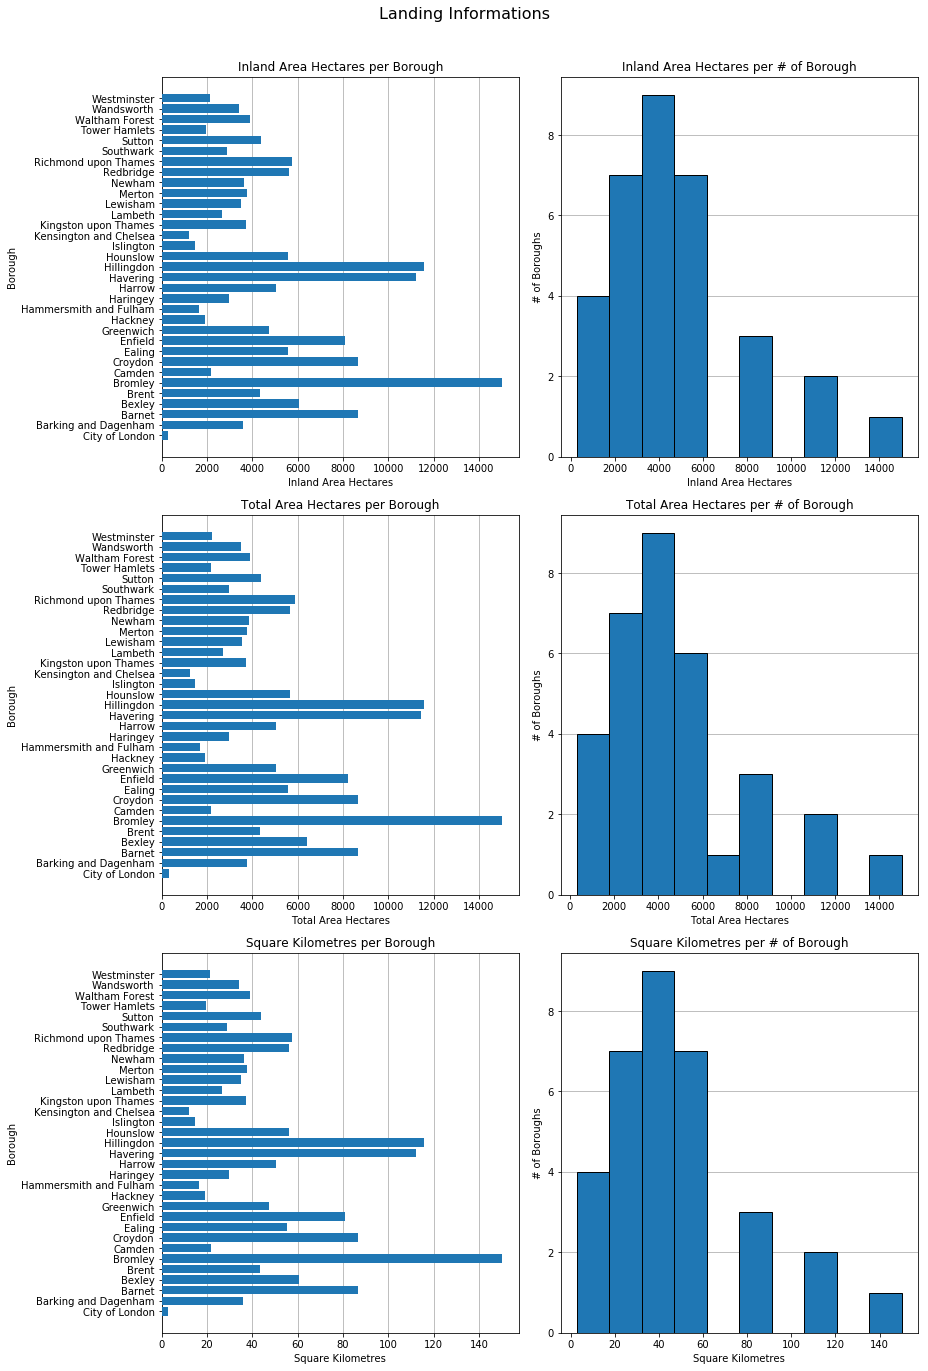

In [4]:
plt.figure(figsize=(13, 20))
index = 0

for name in (land_info.columns[1:]):
    plt.subplot(3, 2, index + 1)
    plt.barh(range(33), land_info[name], zorder=3, )
    plt.title('{} per Borough'.format(name))
    plt.xlabel(name)
    plt.ylabel('Borough')
    plt.yticks(ticks=range(33), labels=land_info['Name'])
    plt.grid(axis='x', zorder=0)
    
    plt.subplot(3, 2, index + 2)
    plt.hist(land_info[name], edgecolor='black', zorder=3)
    plt.title('{} per # of Borough'.format(name))
    plt.xlabel(name)
    plt.ylabel('# of Boroughs')
    plt.grid(axis='y', zorder=0)
    
    index = index + 2

plt.suptitle('Landing Informations', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#### SUMMARY

As we can see, there is one borough that is much bigger than the others, that is, Bromley. The majority of the 
boroughs occupy an area between 2000 and 8000 hectares each, of between 20 and 80 square kilometers each. The 
smallest borough happens to be City of London.

### POPULATION PER BOROUGH<a name='population_per_borough'><a/>

Here I present some visualizations for the population of each borough during the window of time that goes from 2008
to 2016.

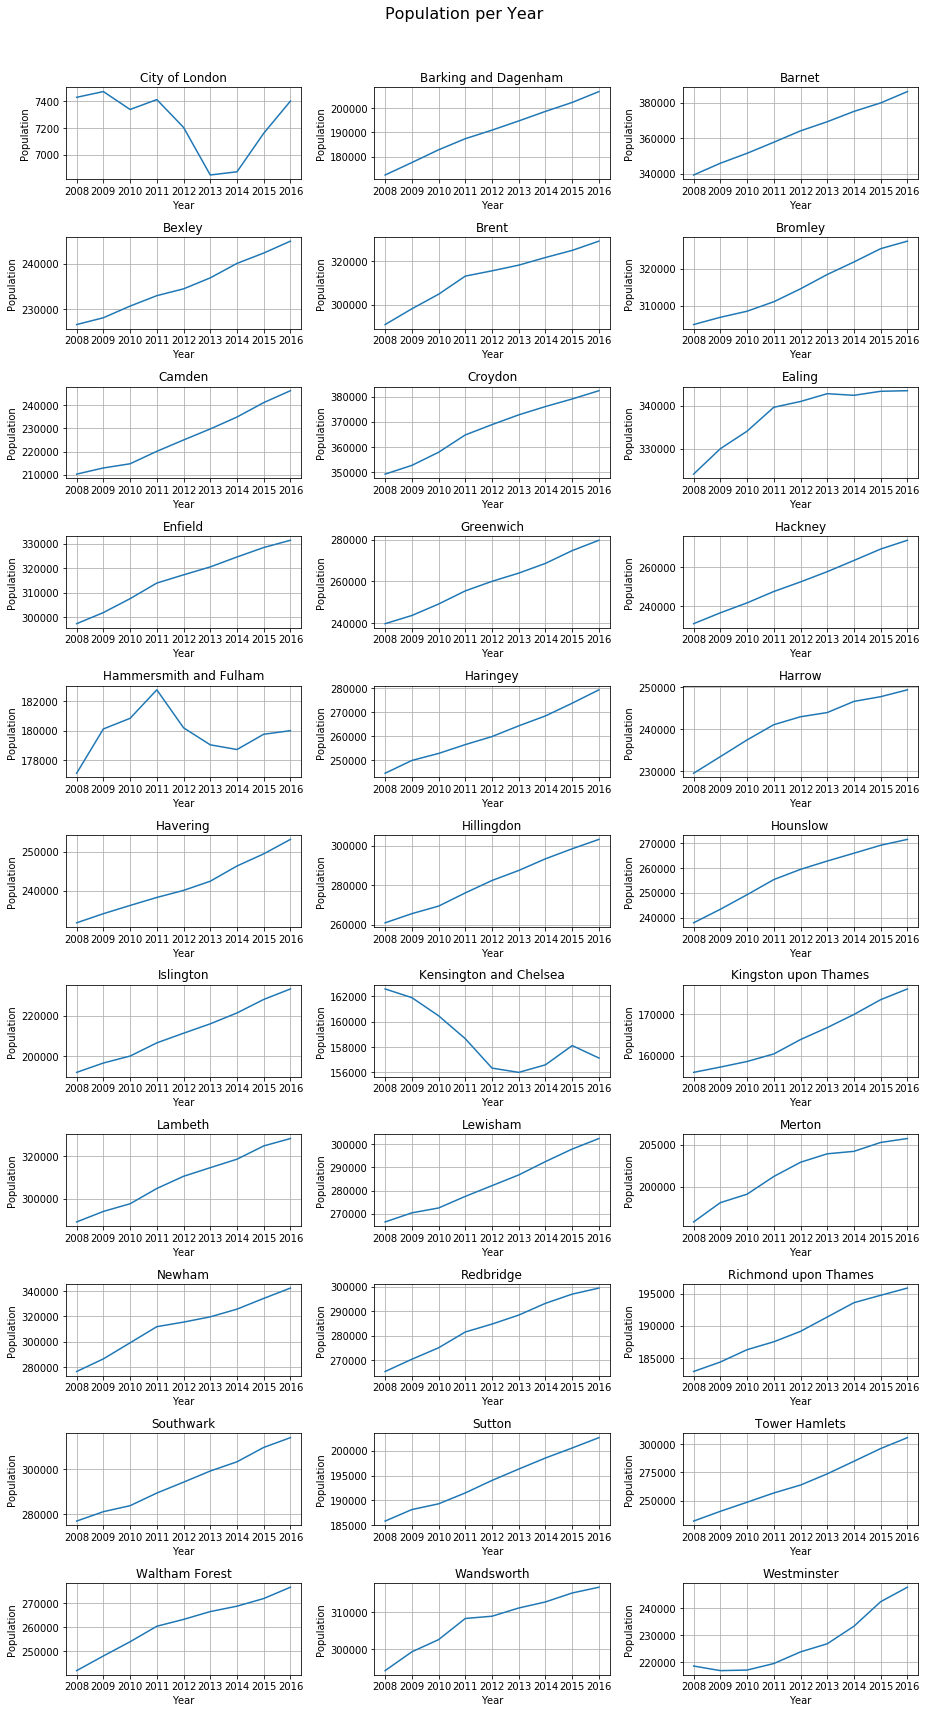

In [5]:
plt.figure(figsize=(13, 25))

for index, borough in enumerate(population['Name'].unique()):
    plt.subplot(11, 3, index + 1)
    plt.plot(range(9), population[population['Name'] == borough]['Population'])
    plt.xticks(ticks=range(9), labels=range(2008, 2017))
    plt.grid()
    plt.title('{}'.format(borough))
    plt.xlabel('Year')
    plt.ylabel('Population')

plt.suptitle('Population per Year', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])